In [4]:
import os
from moscot.problems.time import TemporalProblem
import cellrank as cr
from cellrank.kernels import RealTimeKernel

In [2]:
tp = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/OT_encodrine_analysis/TemporalProblem.pkl")


In [5]:
tmk = RealTimeKernel.from_moscot(tp)

In [19]:
tmk.compute_transition_matrix(self_transitions="all", conn_weight=0.1, threshold=0.0)

100%|██████████| 2/2 [00:00<00:00, 3472.11time pair/s]


RealTimeKernel[n=11645, threshold=0.0, self_transitions='all']

In [20]:
g = cr.estimators.GPCCA(tmk)

In [40]:
g.compute_macrostates(n_states=15, cluster_key="cell_type")

GPCCA[kernel=RealTimeKernel[n=11645], initial_states=None, terminal_states=None]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


AttributeError: property 'categories' of 'Categorical' object has no setter

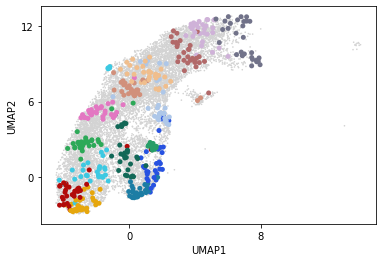

In [41]:
g.plot_macrostates(which="all",legend_loc="right", s=100)

In [43]:
g.macrostates

AAACAGCCAACAGCCT-1    NaN
AAACAGCCAACCCTCC-1    NaN
AAACAGCCACTAAGCC-1    NaN
AAACAGCCATAAAGCA-1    NaN
AAACATGCAAGGTAAC-1    NaN
                     ... 
TTTGGTGCACGTAATT-4    NaN
TTTGTGAAGCGGATTT-4    NaN
TTTGTGAAGTTGTCAA-4    NaN
TTTGTGTTCATTCATC-4    NaN
TTTGTTGGTCACAGCG-4    NaN
Length: 11645, dtype: category
Categories (15, object): ['Ngn3 low_1', 'Ngn3 low_2', 'Ngn3 high_1', 'Alpha_1', ..., 'Fev+', 'Beta_2', 'Fev+ Beta_1', 'Fev+ Beta_2']

In [42]:
g.predict_terminal_states(n_cells=30)


GPCCA[kernel=RealTimeKernel[n=11645], initial_states=None, terminal_states=['Delta', 'Ngn3 low_1']]

In [37]:
g.predict_terminal_states(n_cells=30)

GPCCA[kernel=RealTimeKernel[n=11645], initial_states=None, terminal_states=['Delta_2', 'Ngn3 low_1']]

In [38]:
g.terminal_states

AAACAGCCAACAGCCT-1    NaN
AAACAGCCAACCCTCC-1    NaN
AAACAGCCACTAAGCC-1    NaN
AAACAGCCATAAAGCA-1    NaN
AAACATGCAAGGTAAC-1    NaN
                     ... 
TTTGGTGCACGTAATT-4    NaN
TTTGTGAAGCGGATTT-4    NaN
TTTGTGAAGTTGTCAA-4    NaN
TTTGTGTTCATTCATC-4    NaN
TTTGTTGGTCACAGCG-4    NaN
Length: 11645, dtype: category
Categories (2, object): ['Ngn3 low_1', 'Delta_2']

100%|██████████| 2/2 [00:01<00:00,  1.98/s]


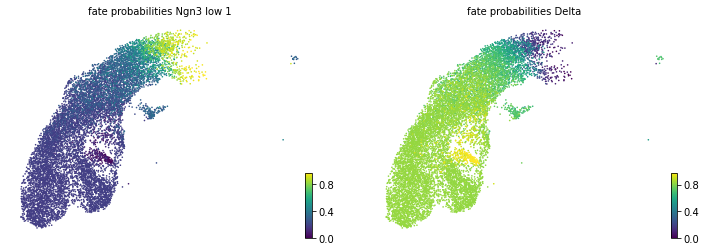

In [44]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False)